In [3]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob2
import tsfel

### Step 1: Because raw data for each subject were saved as an individual file, here I combine raw data for each sensor for analysis

In [2]:
# A function to combine all txt files in the folder
def combine_txt(in_path, outfile_name, out_path):
    os.chdir(in_path)
    filenames = glob2.glob('*.txt') 
    with open(out_path + '/'+ outfile_name+'.txt', 'w') as f:
        for file in filenames:
            with open(file) as infile:
                f.write(infile.read()+'\n')     

In [3]:
#combine txt for phone accelorator data
os.chdir('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw')
in_path = ('./phone/accel')
outfile_name = ('phone_accel')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\combined')
combine_txt(in_path, outfile_name, out_path)

In [4]:
#combine txt for phone gyroscope data 
os.chdir('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw')
in_path = ('./phone/gyro')
outfile_name = ('phone_gyro')
combine_txt(in_path, outfile_name, out_path)

In [5]:
#combine txt for phone accelorator data
os.chdir('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw')
in_path = ('./watch/accel')
outfile_name = ('watch_accel')
combine_txt(in_path, outfile_name, out_path)

In [10]:
#combine txt for phone gyroscope data 
os.chdir('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw')
in_path = ('./phone/gyro')
outfile_name = ('phone_gyro')
combine_txt(in_path, outfile_name, out_path)

### Step 2: investigate data quantity for each sensor

### 2.1 inspect phone accelerator data

In [11]:
os.chdir('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\combined')
phone_accel = pd.read_csv('phone_accel.txt', sep = ',', header = None)
phone_accel.columns = ['subjectID', 'activity', 'timeStamp', 'x_axis', 'y_axis', 'z_axis']

In [12]:
print(phone_accel.head())
phone_accel.shape

   subjectID activity        timeStamp    x_axis     y_axis       z_axis
0       1600        A  252207666810782 -0.364761   8.793503   1.0550842;
1       1600        A  252207717164786 -0.879730   9.768784   1.0169983;
2       1600        A  252207767518790  2.001495  11.109070    2.619156;
3       1600        A  252207817872794  0.450623  12.651642  0.18455505;
4       1600        A  252207868226798 -2.164352  13.928436  -4.4224854;


(4804403, 6)

In [ ]:
features = ['Maximum frequency']

In [17]:
phone_accel.describe(include=np.object)

,activity,z_axis
count,24022015,24022015
unique,18,1078891
top,K,9.932146;
freq,1425950,4950


In [22]:
print(len(phone_accel[phone_accel['x_axis'].isnull()]))
print(len(phone_accel[phone_accel['y_axis'].isnull()]))
print(len(phone_accel[phone_accel['z_axis'].isnull()]))
print(len(phone_accel[phone_accel['timeStamp'].isnull()]))
print(len(phone_accel[phone_accel['activity'].isnull()]))
print(len(phone_accel[phone_accel['subjectID'].isnull()]))

0
0
0
0
0
0


### 2.2 inspect data for other sensors

In [12]:
phone_gyro = pd.read_csv('phone_gyro.txt', sep = ',', header = None)
watch_accel = pd.read_csv('phone_accel.txt', sep = ',', header = None)
watch_gyro = pd.read_csv('phone_gyro.txt', sep = ',', header = None)

In [13]:
print(phone_gyro.shape)
print(watch_accel.shape)
print(watch_gyro.shape)

(3608635, 6)
(24022015, 6)
(3608635, 6)


In [4]:
phone_accel.head()

,subjectID,activity,timeStamp,x_axis,y_axis,z_axis
0,1600,A,252207666810782,-0.364761,8.793503,1.0550842;
1,1600,A,252207717164786,-0.879730,9.768784,1.0169983;
2,1600,A,252207767518790,2.001495,11.109070,2.619156;
3,1600,A,252207817872794,0.450623,12.651642,0.18455505;
4,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;


In [33]:
252207717164786-252207666810782

50354004

In [23]:
# Define a function to summarize the balance of activity data in an output variable column
def class_breakdown(data):
    # convert the numpy array into a dataframe
    df = pd.DataFrame(data)
    # group data by the class value and calculate the number of rows
    counts = df.groupby(['activity']).size()
    # retrieve raw rows
    counts = counts.values
    # summarize
    for i in range(len(counts)):
        percent = counts[i] / len(df) * 100
        print('Activity=%d, total=%d, percentage=%.3f' % (i+1, counts[i], percent))
 

In [24]:
class_breakdown(phone_accel) # summarize the total records for each activity to see whether it is balanced.From the results below,
#the percentage of data record for each activity 

Activity=1, total=1399085, percentage=5.824
Activity=2, total=1342045, percentage=5.587
Activity=3, total=1278225, percentage=5.321
Activity=4, total=1322960, percentage=5.507
Activity=5, total=1348020, percentage=5.612
Activity=6, total=1231780, percentage=5.128
Activity=7, total=1348045, percentage=5.612
Activity=8, total=1353780, percentage=5.636
Activity=9, total=1306800, percentage=5.440
Activity=10, total=1248965, percentage=5.199
Activity=11, total=1425950, percentage=5.936
Activity=12, total=1328905, percentage=5.532
Activity=13, total=1393830, percentage=5.802
Activity=14, total=1361095, percentage=5.666
Activity=15, total=1363650, percentage=5.677
Activity=16, total=1302485, percentage=5.422
Activity=17, total=1340325, percentage=5.580
Activity=18, total=1326070, percentage=5.520


### In this step, I am trying to convert timestamp to readable time format, however, there seems something wrong with the timestamp. All data were converted to sometime in 1970, so I add another colun 'time_ms' to count the time (the data is collected every 50 ms, and ms is for milliseconds) .

In [14]:
# something wrong with timeStamp, convert to milliseconds (ms)
phone_accel['time_ms'] = range(1, 1 + len(phone_accel) * 50, 50)

In [15]:
phone_accel.head()

,subjectID,activity,timeStamp,x_axis,y_axis,z_axis,time_ms
0,1600,A,252207666810782,-0.364761,8.793503,1.0550842;,1
1,1600,A,252207717164786,-0.879730,9.768784,1.0169983;,51
2,1600,A,252207767518790,2.001495,11.109070,2.619156;,101
3,1600,A,252207817872794,0.450623,12.651642,0.18455505;,151
4,1600,A,252207868226798,-2.164352,13.928436,-4.4224854;,201


Text(0, 0.5, '')

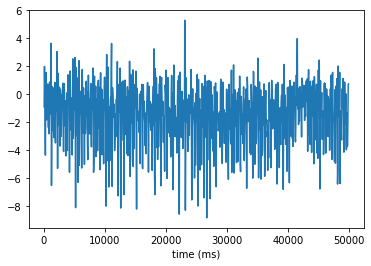

In [16]:
# choose phone accelerator data for subject 1600 to see the data distribution
pl_dt = phone_accel[phone_accel['subjectID'] == 1600]
plt.plot('time_ms', 'x_axis', data=pl_dt[1:1000])
plt.xlabel('time (ms)')
plt.ylabel('')

In [ ]:
#plt.plot( 'time_ms', 'y', data=phone_accel, marker='', color='olive', linewidth=2)
#plt.plot( 'time_ms', 'z', data=phone_accel, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")

(array([1.0000e+01, 2.0000e+01, 1.0000e+01, 5.0000e+00, 0.0000e+00,
        5.0000e+00, 1.0000e+01, 0.0000e+00, 1.0000e+01, 1.0000e+01,
        2.5000e+01, 2.0000e+01, 1.0000e+01, 0.0000e+00, 2.0000e+01,
        5.0000e+00, 5.0000e+00, 5.0000e+00, 1.5000e+01, 1.5000e+01,
        1.0000e+01, 2.0000e+01, 3.0000e+01, 5.5000e+01, 3.0000e+01,
        2.0000e+01, 5.0000e+01, 6.0000e+01, 7.0000e+01, 5.0000e+01,
        6.5000e+01, 1.2000e+02, 9.0000e+01, 1.8500e+02, 1.5000e+02,
        2.7500e+02, 3.3500e+02, 5.9500e+02, 1.0500e+03, 1.4200e+03,
        1.6100e+03, 2.0350e+03, 2.0850e+03, 2.5750e+03, 2.7250e+03,
        3.2600e+03, 3.6950e+03, 4.3850e+03, 5.8850e+03, 6.8050e+03,
        1.4590e+04, 2.0480e+04, 1.4195e+04, 1.3400e+04, 8.3150e+03,
        6.5550e+03, 5.7200e+03, 9.9700e+03, 1.2520e+04, 6.2200e+03,
        2.4000e+03, 1.4995e+04, 3.2730e+04, 2.0610e+04, 7.3800e+03,
        1.0325e+04, 2.2225e+04, 2.6100e+03, 1.2985e+04, 9.3150e+03,
        1.5215e+04, 8.8500e+02, 1.7010e+04, 4.00

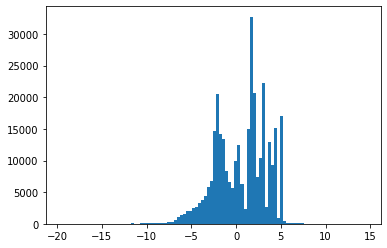

In [21]:
# plot a histogram to see the districution of phone accelerator x axis data for subject 1600.
plt.hist(pl_dt['x_axis'], bins=100)

### To show the data distribution for each activity for subject 1600

In [23]:
# a function to subsest data for a specific activity
def subset_data_for_activity(sub_dt, activity, axis):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_dt)) if sub_dt.iloc[i, 1]==activity]
    # return the selected samples
    return sub_dt[axis].iloc[ix]


# plot histograms for multiple activities
def plot_subject_histograms(sub_dt, n, axis):
    plt.figure(figsize = (18.5, 20.5))
    # get unique subjects
    activities = sub_dt.activity.unique()
    xaxis = None
    for k in range(n):
        activity_id = activities[k]
        # get data for one subject
        subX = subset_data_for_activity(sub_dt, activity_id, axis)
        ax = plt.subplot(n, 1, k+1, sharex=xaxis)
        #ax.set_xlim(-1,1)
        plt.hist(subX, bins=100)
    plt.show()
    #plt.savefig('1600_phone_accel_x.png')


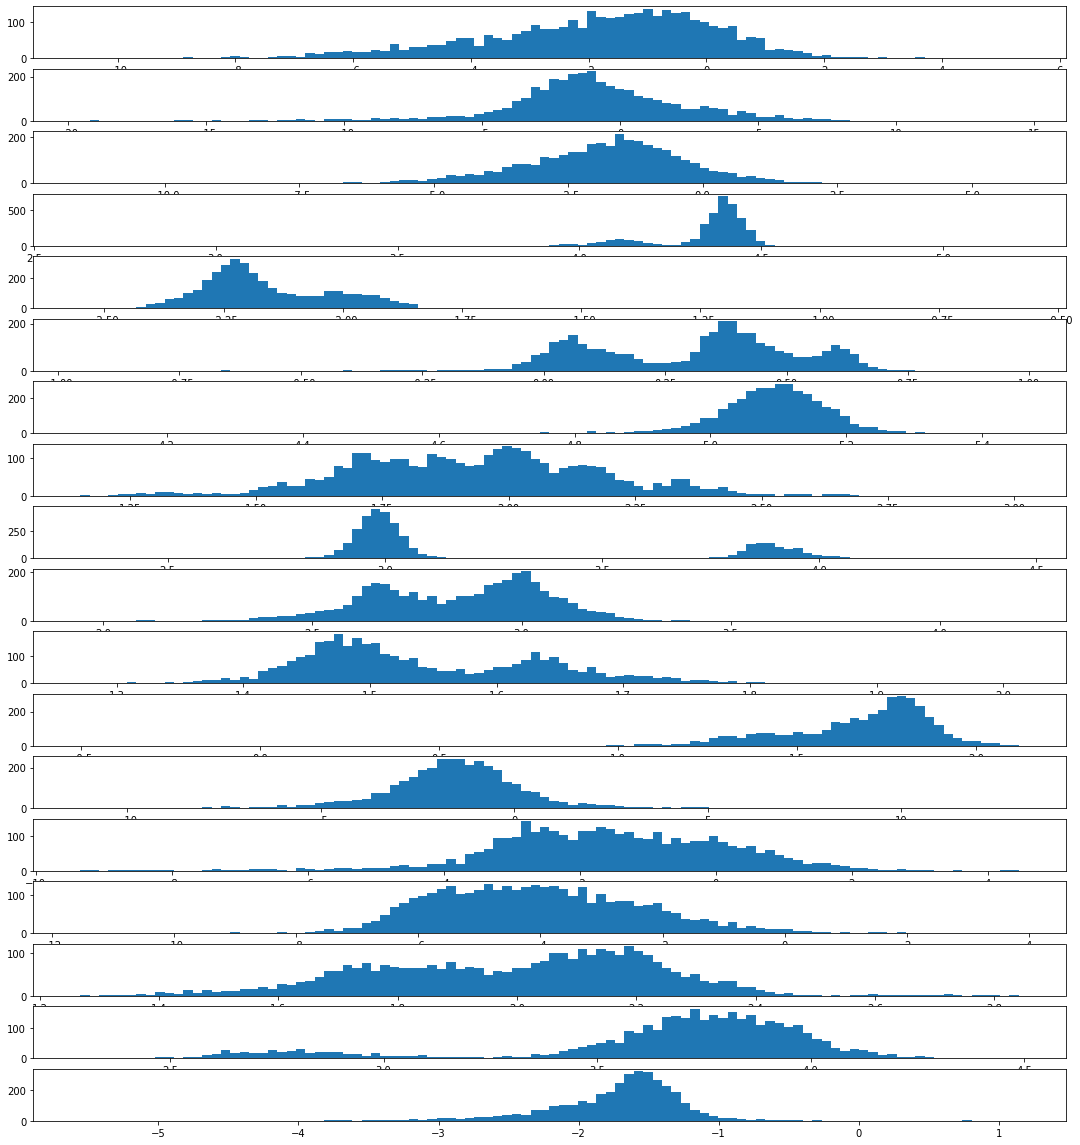

In [24]:
plot_subject_histograms(pl_dt, 18, 'x_axis')

### To show the data distribution for each activity for subject 1600

In [28]:
def subset_data_for_subject(sub_dt, subjectID, axis):
    # get row indexes for the subject id
    ix = [i for i in range(len(sub_dt)) if sub_dt.iloc[i, 0]==subjectID]
    # return the selected samples
    return sub_dt[axis].iloc[ix]

# plot histograms for multiple activities
def plot_subject_histograms(sub_dt, n, axis):
    plt.figure(figsize = (18.5, 20.5))
    # get unique subjects
    subjectIDs = sub_dt.subjectID.unique()
    xaxis = None
    for k in range(n):
        subjectID = subjectIDs[k]
        # get data for one subject
        subX = subset_data_for_subject(sub_dt, subjectID, axis)
        ax = plt.subplot(n, 1, k+1, sharex=xaxis)
        #ax.set_xlim(-1,1)
        plt.hist(subX, bins=100)
    plt.show()
    #plt.savefig('A_phone_accel_x.png')

In [29]:
pl_dt = phone_accel[phone_accel['activity'] == "A"]

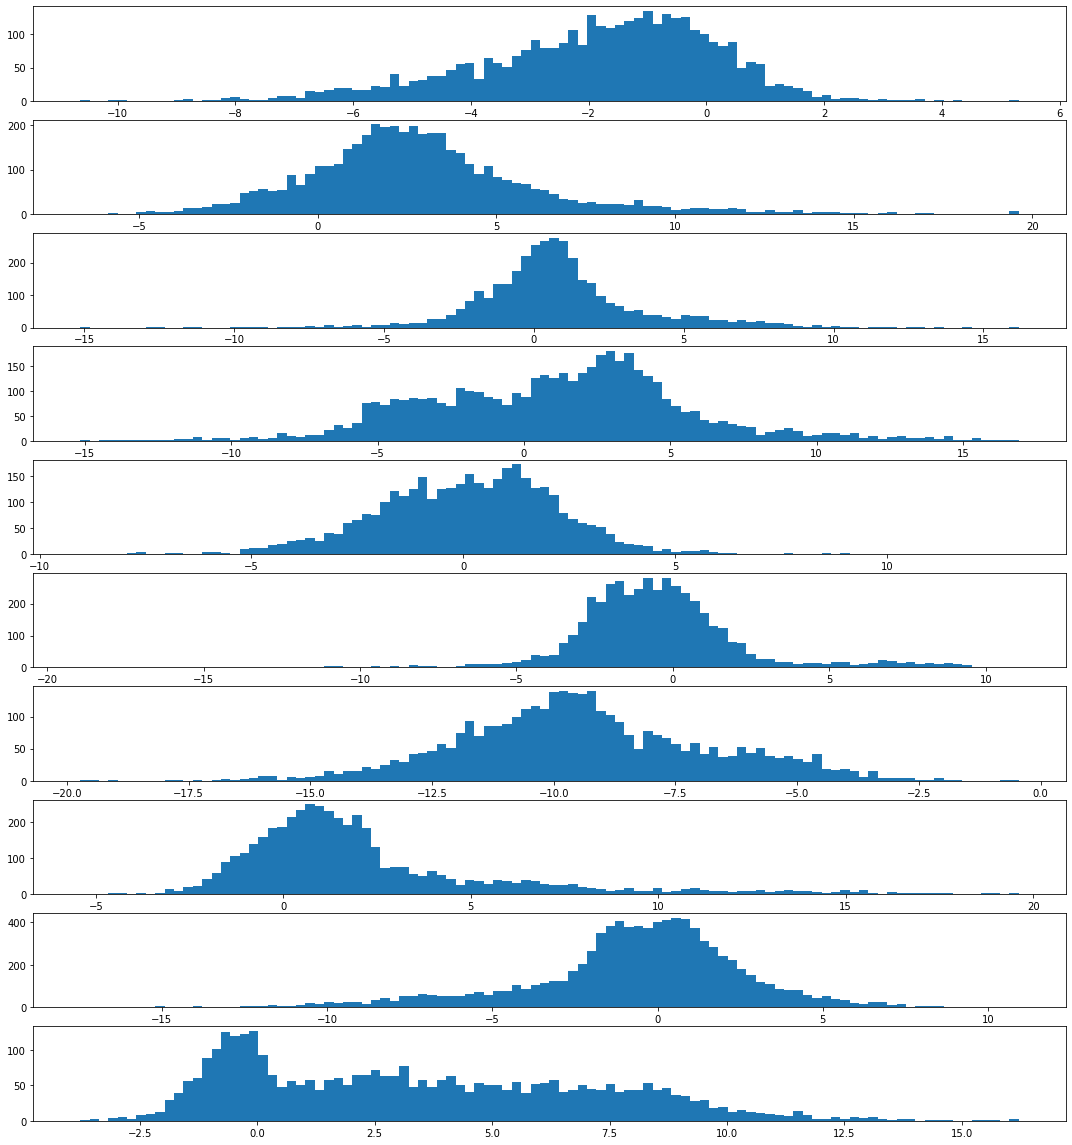

In [30]:
plot_subject_histograms(pl_dt, 10, 'x_axis')

## Step 3. Reduce the noise of the data using weighted moving average filter, and the signal in the first and the last 5 seconds were removed

In [157]:
# Define a function to apply weighted moving average filter to reduce the noise 
def denoise_filter(in_path, input_file_name, out_path, activities):
    os.chdir(in_path)
    input_file = pd.read_csv(input_file_name, sep = ',', header = None)
    input_file.columns = ['subjectID', 'activity', 'timeStamp', 'x_axis', 'y_axis', 'z_axis']
    input_file.iloc[:,5] = input_file.iloc[:,5].str.replace(';',"", regex=True).astype(float)
    #activities = input_file.iloc[:, 1].unique()
    input_file_sub_clean = pd.DataFrame([])
    
    #add new columns
    for newcol in ['x_denoise','y_denoise','z_denoise']:
        input_file[newcol]=np.nan
        
        
    for activity in activities:
        input_file_sub = input_file[input_file.iloc[:, 1] == activity]

        #input_file_sub = input_file.loc[input_file.iloc[:, 1] == activity,:].iloc[:, 3:6]_sub = input_file
        #print(input_file_sub.head())
        #step 1: applying filter
        nrow = input_file_sub.shape[0]
        #input_file_sub[len(input_file_sub.columns)] = 0
        #input_file_sub[len(input_file_sub.columns)] = 0
        #input_file_sub[len(input_file_sub.columns)] = 0
    

        #print(input_file_sub.head())
        for i in range(1, nrow-2):
            #print(input_file_sub.iloc[i-1,0])
            #print(input_file_sub.iloc[i+1,0])
            #input_file_sub.iloc[input_file_sub.index[i],6] = np.round(((input_file_sub.iloc[i-1,3]+ input_file_sub.iloc[i+1,3])/2),1)
            input_file_sub.iloc[i, 6] = np.round(((input_file_sub.iloc[i-1,3]+ input_file_sub.iloc[i+1,3])/2),5)
            #print(input_file_sub.head())
            input_file_sub.iloc[i,7] = np.round(((input_file_sub.iloc[i-1,4]+ input_file_sub.iloc[i+1,4])/2),5)
            input_file_sub.iloc[i,8] = np.round(((input_file_sub.iloc[i-1,5]+ input_file_sub.iloc[i+1,5])/2),5)
        
        #step 2: remove the records of the first and the last 5seconds from the data
        input_file_sub = input_file_sub.iloc[250:(input_file_sub.shape[0]-250),:]
        #input_file_sub_clean[len(input_file_sub_clean.columns)] = activity
        input_file_sub_clean = input_file_sub_clean.append(input_file_sub)
    os.chdir(out_path)
    input_file_sub_clean.to_csv('denoised' + str(input_file_name), index = False)  


# Define a function to loop over all txt files in the folder
def loop_over_files_in_folder_denoise(in_path, out_path, activities):
    os.chdir(in_path)
    filenames = glob2.glob('*.txt') 
    for file in filenames:
        denoise_filter(in_path, file, out_path, activities)

### Step 3.1 To process phone accelerator and gyroscope data. I chose several whole body activities becasue cell phone is usually placed in the pocket and hand activities (e.g. eating) may have very weak signals for cell phone to collect. 

In [159]:
# process phone accelerator data using the denoise function
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel_denoise')
activities = ['A', 'B', 'C', 'O', 'P']
loop_over_files_in_folder_denoise(in_path,out_path, activities)

C:\Users\tongx\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# process phone accelerator data using the denoise function
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro_denoise')
loop_over_files_in_folder_denoise(in_path,out_path, activities)

C:\Users\tongx\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


### Step 3.2 To process watch accelerator and gyroscope data. This time, I only kept hand activities (e.g. eating) because watch is normally wearing on the wraist and these activties will provide strong signals.

In [ ]:
# process watch accelerator data using the denoise function
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel_denoise')
activities = ['F', 'G', 'H', 'K', 'R']
loop_over_files_in_folder_denoise(in_path,out_path, activities)

In [ ]:
# process watch accelerator data using the denoise function
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro_denoise')
activities = ['F', 'G', 'H', 'K', 'R']
loop_over_files_in_folder_denoise(in_path,out_path, activities)

### Step 4: Feature extraction

In [188]:
# Define a function to do feature extraction for each activity in each individual
def feature_extraction_for_individual(in_path, input_file_name, out_path):
    os.chdir(in_path)
    
    # read in data 
    input_file = pd.read_csv(input_file_name, sep = ',')
    #input_file.iloc[:,5] = input_file.iloc[:,5].str.replace(';',"", regex=True).astype(float)
    #input_file[['x_denoise','y_denoise', 'z_denoise']] = input_file[['x_denoise','y_denoise', 'z_denoise']].replace(0, 0.00001)
    #input_file[input_file == 0] = 0.00001 #replace 0 with 0.00001 because the TSFEL function won't work on 0
    # get activity list
    activities = input_file.iloc[:, 1].unique()
    input_file_features = pd.DataFrame([])
    
    # loop over each activity
    for activity in activities:
        print(activity)
        input_file_sub = input_file[input_file.iloc[:, 1] == activity].iloc[:, 6:9]
        input_file_sub[input_file_sub == 0] = 0.00001
        print(input_file_sub.eq(0).any().any())
        #print(input_file_sub.shape)
        
        # feature extraction by functions in tsfel package
        features = tsfel.get_features_by_domain()                                                                               
        #input_file_sub_features = tsfel.time_series_features_extractor(features, input_file_sub, window_splitter=True, window_size=200, overlap = 0.5)
        input_file_sub_features = tsfel.time_series_features_extractor(features, input_file_sub, window_size=250, window_spliter=True, overlap=0.5, fs = 50)

        #print(activity)
        #print(input_file_sub_features)
        #input_file_sub_features[len(input_file_sub_features.columns)] = activity
        input_file_sub_features['activity'] = activity
        input_file_features = input_file_features.append(input_file_sub_features)
        
    # write file     
    os.chdir(out_path)
    input_file_features.to_csv('feature_extracted_' + str(input_file_name), index = False, sep = '\t')       

# A function to loop over all txt files in the folder
def loop_over_files_in_folder_feature_extraction(in_path, out_path):
    os.chdir(in_path)
    filenames = glob2.glob('*.txt') 
    for file in filenames:
        feature_extraction_for_individual(in_path, file, out_path)

    

#combine txt for phone accelorator data
#in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel')
#out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\feature_extracted\\phone_accel')


### Step 4.1 To perform feature extraction for cell phone accelerator and gyrosope data

In [189]:
# perform feature extraction with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel_denoise')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel_feature_extract')

loop_over_files_in_folder_feature_extraction(in_path, out_path)

6
A
False
*** Feature extraction started ***
*** Feature extraction finished ***
B
False
*** Feature extraction started ***
*** Feature extraction finished ***
C
False
*** Feature extraction started ***
*** Feature extraction finished ***
M
False
*** Feature extraction started ***
*** Feature extraction finished ***
O
False
*** Feature extraction started ***
*** Feature extraction finished ***
P
False
*** Feature extraction started ***
*** Feature extraction finished ***
6
A
False
*** Feature extraction started ***
*** Feature extraction finished ***
B
False
*** Feature extraction started ***
*** Feature extraction finished ***
C
False
*** Feature extraction started ***
*** Feature extraction finished ***
M
False
*** Feature extraction started ***
*** Feature extraction finished ***
O
False
*** Feature extraction started ***
*** Feature extraction finished ***
P
False
*** Feature extraction started ***
*** Feature extraction finished ***
6
A
False
*** Feature extraction started ***
***

KeyError: 0

In [ ]:
# perform feature extraction with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro_denoise')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro_feature_extract')

loop_over_files_in_folder_feature_extraction(in_path, out_path)

### Step 4.2 To perform feature extraction for smart watch accelerator and gyrosope data

In [ ]:
# perform feature extraction with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel_denoise')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel_feature_extract')

loop_over_files_in_folder_feature_extraction(in_path, out_path)

In [ ]:
# perform feature extraction with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro_denoise')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro_feature_extract')

loop_over_files_in_folder_feature_extraction(in_path, out_path)

### Step 5: Feature selection according to previous publications

In [191]:
def select_features(in_path, input_file_name, out_path):
    os.chdir(in_path)
    
    # read in data 
    input_file = pd.read_csv(input_file_name, sep = '\t')
    #input_file.iloc[:,5] = input_file.iloc[:,5].str.replace(';',"", regex=True).astype(float)
    
        # get activity list
    activities = input_file['activity'].unique()
    input_file_feature_sel = pd.DataFrame([])
    
    # loop over each activity
    for activity in activities:
        #print(activity)
        input_file_sub = input_file[input_file['activity'] == activity]
        #print(input_file_sub.shape)
        
        # transpose data
        input_file_t = input_file_sub.transpose().reset_index()
        #split index into three rows
        input_file_t[['axis', 'addon','feature']] = input_file_t['index'].str.split('_', 2, expand = True)
        #select features
        features = ['Interquartile range', 'Kurtosis', 'Max', 'Mean', 'Mean absolute deviation', 'Median', 'Median absolute deviation',\
                    'Min', 'Root mean square', 'Skewness', 'Standard deviation', 'Variance', 'Maximum peaks', 'Mean absolute diff',\
                    'Mean diff', 'Minimum peaks', 'Signal distance', 'Sum absolute diff', 'Total energy', 'Slope', 'Absolute energy',\
                    'Peak to peak distance', 'Entropy']
        input_file_sel = input_file_t[input_file_t['feature'].isin(features)].drop(['addon', 'index'], axis = 1)
        input_file_sel.columns.values[0:23] = ['w' + str(col) for col in range(1,24)] #generate new column names

        #add activity column
        input_file_sel['activity'] = activity
        #print(input_file_sel.shape)
        input_file_feature_sel = input_file_feature_sel.append(input_file_sel)
        #print(input_file_feature_sel.shape)      
  
    # write file     
    os.chdir(out_path)
    input_file_feature_sel.iloc[:,0:26].to_csv('feature_selected_' + str(input_file_name), index = False, sep = '\t')       

# A function to loop over all txt files in the folder
def loop_over_files_in_folder_feature_selection(in_path, out_path):
    os.chdir(in_path)
    filenames = glob2.glob('*.txt') 
    for file in filenames:
        select_features(in_path, file, out_path)


### Step 5.1 To perform feature selection for smart phone data

In [192]:
# perform feature selection with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel_feature_extract')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\accel_feature_selected')

loop_over_files_in_folder_feature_selection(in_path, out_path)

In [ ]:
# perform feature selection with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro_feature_extract')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\phone\\gyro_feature_selected')

loop_over_files_in_folder_feature_extraction(in_path, out_path)

### Step 5.2 To perform feature selection for smart watch data

In [ ]:
# perform feature selection with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel_feature_extract')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\accel_feature_selected')

loop_over_files_in_folder_feature_selection(in_path, out_path)

In [ ]:
# perform feature selection with the function above
in_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro_feature_extract')
out_path = ('C:\\Users\\tongx\\Desktop\\sally_data_courses\\CKME136\\wisdm-dataset\\raw\\watch\\gyro_feature_selected')

loop_over_files_in_folder_feature_extraction(in_path, out_path)